## PASSING DATA

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
pd.set_option('display.max_rows', 100)

# Fetch the web page
url = 'https://www.pro-football-reference.com/years/2023/passing.htm'
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

# Locate the table
table = soup.find('table', {'id': 'passing'})

# Extract headers
headers = []
for th in table.find('thead').find_all('th'):
    headers.append(th.text.strip())

# Extract rows
rows = []
for tr in table.find('tbody').find_all('tr'):
    cells = [td.text.strip() for td in tr.find_all('td')]
    if cells:  # Ensure non-empty cells
        rows.append(cells)


# Create DataFrame and save to CSV
passing = pd.DataFrame(rows, columns=headers[1:])# Skip the first header which is an index
if 'Yds.1' in passing.columns:
    passing = passing.drop(columns=['Yds.1'])
passing = passing[passing['Pos'] == 'QB']

passing.columns = [f'{col}_{i}' if col == 'Yds' else col for i, col in enumerate(passing.columns)]

# Remove the second "Yds" column
if 'Yds_25' in passing.columns:
    passing = passing.drop(columns=['Yds_25'])

passing = passing.rename(columns={'Yds': 'Yds_10'})

# Convert numerical columns to float, filling missing values with NaN
passing = passing.apply(pd.to_numeric, errors='ignore').fillna(0)
passing['TD/Int'] = round(passing['TD']/passing['Int'],2)

passing = passing[passing['G'] >= 8]
passing.to_csv('nfl_passing_2023.csv', index=False)
passing

,Player,Tm,Age,Pos,G,GS,QBrec,Cmp,Att,Cmp%,...,Y/G,Rate,QBR,Sk,Sk%,NY/A,ANY/A,4QC,GWD,TD/Int
0,Tua Tagovailoa*,MIA,25,QB,17,17,11-6-0,388,560,69.3,...,272.0,101.1,60.8,29,4.9,7.56,7.48,2.0,2.0,2.07
1,Jared Goff,DET,29,QB,17,17,12-5-0,407,605,67.3,...,269.1,97.9,60.3,30,4.7,6.89,6.99,2.0,3.0,2.50
2,Dak Prescott*,DAL,30,QB,17,17,12-5-0,410,590,69.5,...,265.6,105.9,72.7,39,6.2,6.77,7.28,2.0,3.0,4.00
3,Josh Allen,BUF,27,QB,17,17,11-6-0,385,579,66.5,...,253.3,92.2,69.6,24,4.0,6.89,6.51,2.0,4.0,1.61
4,Brock Purdy*,SFO,24,QB,16,16,12-4-0,308,444,69.4,...,267.5,113.0,72.8,28,5.9,8.74,9.01,0.0,0.0,2.82
5,Patrick Mahomes*,KAN,28,QB,16,16,10-6-0,401,597,67.2,...,261.4,92.6,63.1,27,4.3,6.41,6.26,1.0,2.0,1.93
6,Jordan Love,GNB,25,QB,17,17,9-8-0,372,579,64.2,...,244.6,96.1,62.1,30,4.9,6.43,6.67,2.0,3.0,2.91
7,C.J. Stroud*,HOU,22,QB,15,15,9-6-0,319,499,63.9,...,273.9,100.8,57.5,38,7.1,7.03,7.47,1.0,3.0,4.60
8,Baker Mayfield*,TAM,28,QB,17,17,9-8-0,364,566,64.3,...,237.9,94.6,54.3,40,6.6,6.29,6.47,1.0,2.0,2.80
9,Trevor Lawrence,JAX,24,QB,16,16,8-8-0,370,564,65.6,...,251.0,88.5,56.1,35,5.8,6.33,5.98,1.0,2.0,1.50


In [2]:
passing2 = passing[['Player', 'Yds_10', 'Cmp%', 'TD/Int', 'ANY/A', 'Sk', 'GWD', '4QC']]
passing2.columns = ['Player', 'Yds', 'Cmp%', 'TD/Int',  'ANY/A', 'Sk', 'GWD', '4QC']
passing2

,Player,Yds,Cmp%,TD/Int,ANY/A,Sk,GWD,4QC
0,Tua Tagovailoa*,4624,69.3,2.07,7.48,29,2.0,2.0
1,Jared Goff,4575,67.3,2.50,6.99,30,3.0,2.0
2,Dak Prescott*,4516,69.5,4.00,7.28,39,3.0,2.0
3,Josh Allen,4306,66.5,1.61,6.51,24,4.0,2.0
4,Brock Purdy*,4280,69.4,2.82,9.01,28,0.0,0.0
5,Patrick Mahomes*,4183,67.2,1.93,6.26,27,2.0,1.0
6,Jordan Love,4159,64.2,2.91,6.67,30,3.0,2.0
7,C.J. Stroud*,4108,63.9,4.60,7.47,38,3.0,1.0
8,Baker Mayfield*,4044,64.3,2.80,6.47,40,2.0,1.0
9,Trevor Lawrence,4016,65.6,1.50,5.98,35,2.0,1.0


## RUSHING DATA

In [3]:
url = 'https://www.pro-football-reference.com/years/2023/rushing.htm'
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

# Locate the table
table = soup.find('table', {'id': 'rushing'})

# Extract headers
headers = [th.text.strip() for th in table.find('thead').find_all('th')]

# Extract rows
rows = []
for tr in table.find('tbody').find_all('tr'):
    cells = [td.text.strip() for td in tr.find_all('td')]
    if cells:  # Ensure non-empty cells
        rows.append(cells)

# Create DataFrame and save to CSV
rushing = pd.DataFrame(rows, columns=headers[5:])  # Skip the first header which is an index

# List of numerical columns to convert
numeric_columns = [
    'Age', 'G', 'GS', 'Att', 'Yds', 'TD', 'Lng', 'Y/A', 'Y/G', 'Fmb'
]

# Replace non-numeric values and empty strings with NaN
rushing[numeric_columns] = rushing[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Fill NaN values with 0
rushing[numeric_columns] = rushing[numeric_columns].fillna(0)

# Convert the relevant columns to float
rushing[numeric_columns] = rushing[numeric_columns].astype(float)
rushing = rushing[rushing['Pos'] == 'QB']
# Display DataFrame and save to CSV
rushing.to_csv('nfl_rushing_2023.csv', index=False)
rushing.rename(columns={'Yds': 'rushing_yds'}, inplace=True)
rushing

,Player,Tm,Age,Pos,G,GS,Att,rushing_yds,TD,1D,Succ%,Lng,Y/A,Y/G,Fmb
34,Jalen Hurts*,PHI,25.0,QB,17.0,17.0,157.0,605.0,15.0,68,61.1,24.0,3.9,35.6,9.0
37,Lamar Jackson*+,BAL,26.0,QB,16.0,16.0,148.0,821.0,5.0,48,54.1,30.0,5.5,51.3,11.0
43,Justin Fields,CHI,24.0,QB,13.0,13.0,124.0,657.0,4.0,43,52.4,39.0,5.3,50.5,10.0
44,Josh Allen,BUF,27.0,QB,17.0,17.0,111.0,524.0,15.0,57,65.8,23.0,4.7,30.8,7.0
56,Taysom Hill,NOR,33.0,QB,16.0,7.0,81.0,401.0,4.0,26,64.2,27.0,5.0,25.1,1.0
58,Russell Wilson,DEN,35.0,QB,15.0,15.0,80.0,341.0,3.0,38,55.0,21.0,4.3,22.7,10.0
60,Joshua Dobbs,2TM,28.0,QB,13.0,12.0,77.0,421.0,6.0,31,49.4,44.0,5.5,32.4,14.0
63,Patrick Mahomes*,KAN,28.0,QB,16.0,16.0,75.0,389.0,0.0,27,50.7,25.0,5.2,24.3,5.0
66,Trevor Lawrence,JAX,24.0,QB,16.0,16.0,70.0,339.0,4.0,23,47.1,26.0,4.8,21.2,12.0
70,Baker Mayfield*,TAM,28.0,QB,17.0,17.0,62.0,163.0,1.0,16,35.5,31.0,2.6,9.6,8.0


## COMBINE THE NEEDED COLUMNS

In [4]:
rushing_selected = rushing[['Player', 'rushing_yds']]

# Merge the two DataFrames on 'Player'
combined = pd.merge(passing2, rushing_selected, on='Player', how='left', suffixes=('_pass', '_rush'))
combined

,Player,Yds,Cmp%,TD/Int,ANY/A,Sk,GWD,4QC,rushing_yds
0,Tua Tagovailoa*,4624,69.3,2.07,7.48,29,2.0,2.0,74.0
1,Jared Goff,4575,67.3,2.50,6.99,30,3.0,2.0,21.0
2,Dak Prescott*,4516,69.5,4.00,7.28,39,3.0,2.0,242.0
3,Josh Allen,4306,66.5,1.61,6.51,24,4.0,2.0,524.0
4,Brock Purdy*,4280,69.4,2.82,9.01,28,0.0,0.0,144.0
5,Patrick Mahomes*,4183,67.2,1.93,6.26,27,2.0,1.0,389.0
6,Jordan Love,4159,64.2,2.91,6.67,30,3.0,2.0,247.0
7,C.J. Stroud*,4108,63.9,4.60,7.47,38,3.0,1.0,167.0
8,Baker Mayfield*,4044,64.3,2.80,6.47,40,2.0,1.0,163.0
9,Trevor Lawrence,4016,65.6,1.50,5.98,35,2.0,1.0,339.0


## FINDING RANKS

In [5]:
columns_to_rank = {
    'Yds': 'desc',
    'Cmp%': 'desc',
    'TD/Int': 'desc',
    'ANY/A': 'desc',
    'Sk': 'asc',
    'GWD': 'desc',
    '4QC': 'desc',
    'rushing_yds': 'desc'
}

# Rank the columns
for column, order in columns_to_rank.items():
    if order == 'desc':
        combined[f'rank_{column}'] = combined[column].rank(ascending=False, method='min')
    else:
        combined[f'rank_{column}'] = combined[column].rank(ascending=True, method='min')

# Display the DataFrame
combined

,Player,Yds,Cmp%,TD/Int,ANY/A,Sk,GWD,4QC,rushing_yds,rank_Yds,rank_Cmp%,rank_TD/Int,rank_ANY/A,rank_Sk,rank_GWD,rank_4QC,rank_rushing_yds
0,Tua Tagovailoa*,4624,69.3,2.07,7.48,29,2.0,2.0,74.0,1.0,5.0,17.0,3.0,17.0,11.0,6.0,29.0
1,Jared Goff,4575,67.3,2.50,6.99,30,3.0,2.0,21.0,2.0,7.0,13.0,8.0,19.0,6.0,6.0,37.0
2,Dak Prescott*,4516,69.5,4.00,7.28,39,3.0,2.0,242.0,3.0,2.0,3.0,6.0,33.0,6.0,6.0,14.0
3,Josh Allen,4306,66.5,1.61,6.51,24,4.0,2.0,524.0,4.0,11.0,27.0,12.0,9.0,2.0,6.0,4.0
4,Brock Purdy*,4280,69.4,2.82,9.01,28,0.0,0.0,144.0,5.0,4.0,10.0,1.0,15.0,34.0,30.0,23.0
5,Patrick Mahomes*,4183,67.2,1.93,6.26,27,2.0,1.0,389.0,6.0,8.0,21.0,16.0,14.0,11.0,17.0,7.0
6,Jordan Love,4159,64.2,2.91,6.67,30,3.0,2.0,247.0,7.0,22.0,8.0,10.0,19.0,6.0,6.0,12.0
7,C.J. Stroud*,4108,63.9,4.60,7.47,38,3.0,1.0,167.0,8.0,25.0,2.0,4.0,32.0,6.0,17.0,20.0
8,Baker Mayfield*,4044,64.3,2.80,6.47,40,2.0,1.0,163.0,9.0,21.0,11.0,13.0,34.0,11.0,17.0,21.0
9,Trevor Lawrence,4016,65.6,1.50,5.98,35,2.0,1.0,339.0,10.0,14.0,29.0,20.0,28.0,11.0,17.0,9.0


## FINAL RANK

In [6]:
rank_columns = [f'rank_{column}' for column in columns_to_rank.keys()]
combined['overall_rank'] = combined[rank_columns].mean(axis=1)

# Sort by overall rank
combined = combined.sort_values(by='overall_rank')

In [7]:
combined = combined.sort_values(by='overall_rank')

# Reset index to create final rank
combined['final_Rank'] = combined['overall_rank'].rank(method='dense').astype(int)

# Display the DataFrame
combined

,Player,Yds,Cmp%,TD/Int,ANY/A,Sk,GWD,4QC,rushing_yds,rank_Yds,rank_Cmp%,rank_TD/Int,rank_ANY/A,rank_Sk,rank_GWD,rank_4QC,rank_rushing_yds,overall_rank,final_Rank
2,Dak Prescott*,4516,69.5,4.00,7.28,39,3.0,2.0,242.0,3.0,2.0,3.0,6.0,33.0,6.0,6.0,14.0,9.125,1
3,Josh Allen,4306,66.5,1.61,6.51,24,4.0,2.0,524.0,4.0,11.0,27.0,12.0,9.0,2.0,6.0,4.0,9.375,2
0,Tua Tagovailoa*,4624,69.3,2.07,7.48,29,2.0,2.0,74.0,1.0,5.0,17.0,3.0,17.0,11.0,6.0,29.0,11.125,3
6,Jordan Love,4159,64.2,2.91,6.67,30,3.0,2.0,247.0,7.0,22.0,8.0,10.0,19.0,6.0,6.0,12.0,11.250,4
1,Jared Goff,4575,67.3,2.50,6.99,30,3.0,2.0,21.0,2.0,7.0,13.0,8.0,19.0,6.0,6.0,37.0,12.250,5
5,Patrick Mahomes*,4183,67.2,1.93,6.26,27,2.0,1.0,389.0,6.0,8.0,21.0,16.0,14.0,11.0,17.0,7.0,12.500,6
18,Russell Wilson,3070,66.4,3.25,6.04,45,4.0,4.0,341.0,19.0,12.0,6.0,19.0,36.0,2.0,1.0,8.0,12.875,7
15,Geno Smith*,3624,64.7,2.22,6.39,31,5.0,4.0,155.0,16.0,19.0,15.0,14.0,23.0,1.0,1.0,22.0,13.875,8
7,C.J. Stroud*,4108,63.9,4.60,7.47,38,3.0,1.0,167.0,8.0,25.0,2.0,4.0,32.0,6.0,17.0,20.0,14.250,9
13,Jalen Hurts*,3858,65.4,1.53,5.96,36,4.0,3.0,605.0,14.0,15.0,28.0,21.0,29.0,2.0,3.0,3.0,14.375,10


In [8]:
import re
def clean_name(name):
    return re.sub(r'[\*\+]', '', name).strip()

# Apply the function to clean the 'Player' column
combined['Player'] = combined['Player'].apply(clean_name)

## SALARY INFORMATION

In [9]:
url = 'https://overthecap.com/position/quarterback'
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

# Locate the table
table = soup.find('table')

# Extract headers
headers = [th.text.strip() for th in table.find('thead').find_all('th')]

# Extract rows
rows = []
for tr in table.find('tbody').find_all('tr'):
    cells = [td.text.strip() for td in tr.find_all('td')]
    if cells:  # Ensure non-empty cells
        rows.append(cells)

# Create DataFrame
contracts = pd.DataFrame(rows, columns=headers)

# Select relevant columns from contracts
contracts_selected = contracts[['Player', 'Avg./Year']]

# Clean 'Total Value' column by removing commas and dollar signs and converting to float
contracts_selected['Avg./Year'] = contracts_selected['Avg./Year'].replace('[\$,]', '', regex=True).astype(float)


/var/folders/67/msxtw_396f717ppm_2k2fjbw0000gn/T/ipykernel_55742/3219034424.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  contracts_selected['Avg./Year'] = contracts_selected['Avg./Year'].replace('[\$,]', '', regex=True).astype(float)


In [10]:
combined = pd.merge(combined, contracts_selected, on='Player', how='left')

In [11]:
combined.sort_values('Avg./Year', ascending = False)

,Player,Yds,Cmp%,TD/Int,ANY/A,Sk,GWD,4QC,rushing_yds,rank_Yds,rank_Cmp%,rank_TD/Int,rank_ANY/A,rank_Sk,rank_GWD,rank_4QC,rank_rushing_yds,overall_rank,final_Rank,Avg./Year
3,Jordan Love,4159,64.2,2.91,6.67,30,3.0,2.0,247.0,7.0,22.0,8.0,10.0,19.0,6.0,6.0,12.0,11.250,4,55000000.0
25,Joe Burrow,2309,66.8,2.50,5.55,24,0.0,0.0,88.0,25.0,10.0,13.0,26.0,9.0,34.0,30.0,27.0,21.750,25,55000000.0
16,Trevor Lawrence,4016,65.6,1.50,5.98,35,2.0,1.0,339.0,10.0,14.0,29.0,20.0,28.0,11.0,17.0,9.0,17.250,16,55000000.0
2,Tua Tagovailoa,4624,69.3,2.07,7.48,29,2.0,2.0,74.0,1.0,5.0,17.0,3.0,17.0,11.0,6.0,29.0,11.125,3,53100000.0
4,Jared Goff,4575,67.3,2.50,6.99,30,3.0,2.0,21.0,2.0,7.0,13.0,8.0,19.0,6.0,6.0,37.0,12.250,5,53000000.0
14,Justin Herbert,3134,65.1,2.86,6.16,29,1.0,1.0,228.0,18.0,16.0,9.0,17.0,17.0,23.0,17.0,15.0,16.500,14,52500000.0
10,Lamar Jackson,3678,67.2,3.43,7.34,37,0.0,1.0,821.0,15.0,8.0,5.0,5.0,30.0,34.0,17.0,1.0,14.375,10,52000000.0
9,Jalen Hurts,3858,65.4,1.53,5.96,36,4.0,3.0,605.0,14.0,15.0,28.0,21.0,29.0,2.0,3.0,3.0,14.375,10,51000000.0
12,Kyler Murray,1799,65.7,2.00,5.79,18,2.0,2.0,244.0,32.0,13.0,18.0,22.0,6.0,11.0,6.0,13.0,15.125,12,46100000.0
18,Kirk Cousins,2331,69.5,3.60,7.18,17,0.0,0.0,25.0,24.0,2.0,4.0,7.0,4.0,34.0,30.0,36.0,17.625,18,45000000.0


## Manually correcting NAN contract values

In [13]:
manual_contracts = {
    'Matthew Stafford': 40000000,
    'Taysom Hill': 10000000,
    'Gardner Minshew II': 12500000,
    'Ryan Tannehill': 29500000
}

manual_df = pd.DataFrame(list(manual_contracts.items()), columns=['Player', 'Avg./Year'])

# Combine the manual contracts with the scraped contracts
contracts_selected = pd.concat([contracts_selected, manual_df], ignore_index=True)

# Merge the two DataFrames on 'Player'
combined = pd.merge(combined, contracts_selected, on='Player', how='left')
combined['Avg./Year'] = combined['Avg./Year_x'].combine_first(combined['Avg./Year_y'])

# Drop the old 'Total Value_x' and 'Total Value_y' columns
combined.drop(columns=['Avg./Year_x', 'Avg./Year_y'], inplace=True)

In [30]:
combined.sort_values('Avg./Year', ascending = False)

,Player,Yds,Cmp%,TD/Int,ANY/A,Sk,GWD,4QC,rushing_yds,rank_Yds,rank_Cmp%,rank_TD/Int,rank_ANY/A,rank_Sk,rank_GWD,rank_4QC,rank_rushing_yds,overall_rank,final_Rank,Avg./Year
3,Jordan Love,4159,64.2,2.91,6.67,30,3.0,2.0,247.0,7.0,22.0,8.0,10.0,19.0,6.0,6.0,12.0,11.250,4,55000000.0
28,Joe Burrow,2309,66.8,2.50,5.55,24,0.0,0.0,88.0,25.0,10.0,13.0,26.0,9.0,34.0,30.0,27.0,21.750,25,55000000.0
16,Trevor Lawrence,4016,65.6,1.50,5.98,35,2.0,1.0,339.0,10.0,14.0,29.0,20.0,28.0,11.0,17.0,9.0,17.250,16,55000000.0
2,Tua Tagovailoa,4624,69.3,2.07,7.48,29,2.0,2.0,74.0,1.0,5.0,17.0,3.0,17.0,11.0,6.0,29.0,11.125,3,53100000.0
4,Jared Goff,4575,67.3,2.50,6.99,30,3.0,2.0,21.0,2.0,7.0,13.0,8.0,19.0,6.0,6.0,37.0,12.250,5,53000000.0
14,Justin Herbert,3134,65.1,2.86,6.16,29,1.0,1.0,228.0,18.0,16.0,9.0,17.0,17.0,23.0,17.0,15.0,16.500,14,52500000.0
10,Lamar Jackson,3678,67.2,3.43,7.34,37,0.0,1.0,821.0,15.0,8.0,5.0,5.0,30.0,34.0,17.0,1.0,14.375,10,52000000.0
9,Jalen Hurts,3858,65.4,1.53,5.96,36,4.0,3.0,605.0,14.0,15.0,28.0,21.0,29.0,2.0,3.0,3.0,14.375,10,51000000.0
12,Kyler Murray,1799,65.7,2.00,5.79,18,2.0,2.0,244.0,32.0,13.0,18.0,22.0,6.0,11.0,6.0,13.0,15.125,12,46100000.0
5,Patrick Mahomes,4183,67.2,1.93,6.26,27,2.0,1.0,389.0,6.0,8.0,21.0,16.0,14.0,11.0,17.0,7.0,12.500,6,45000000.0


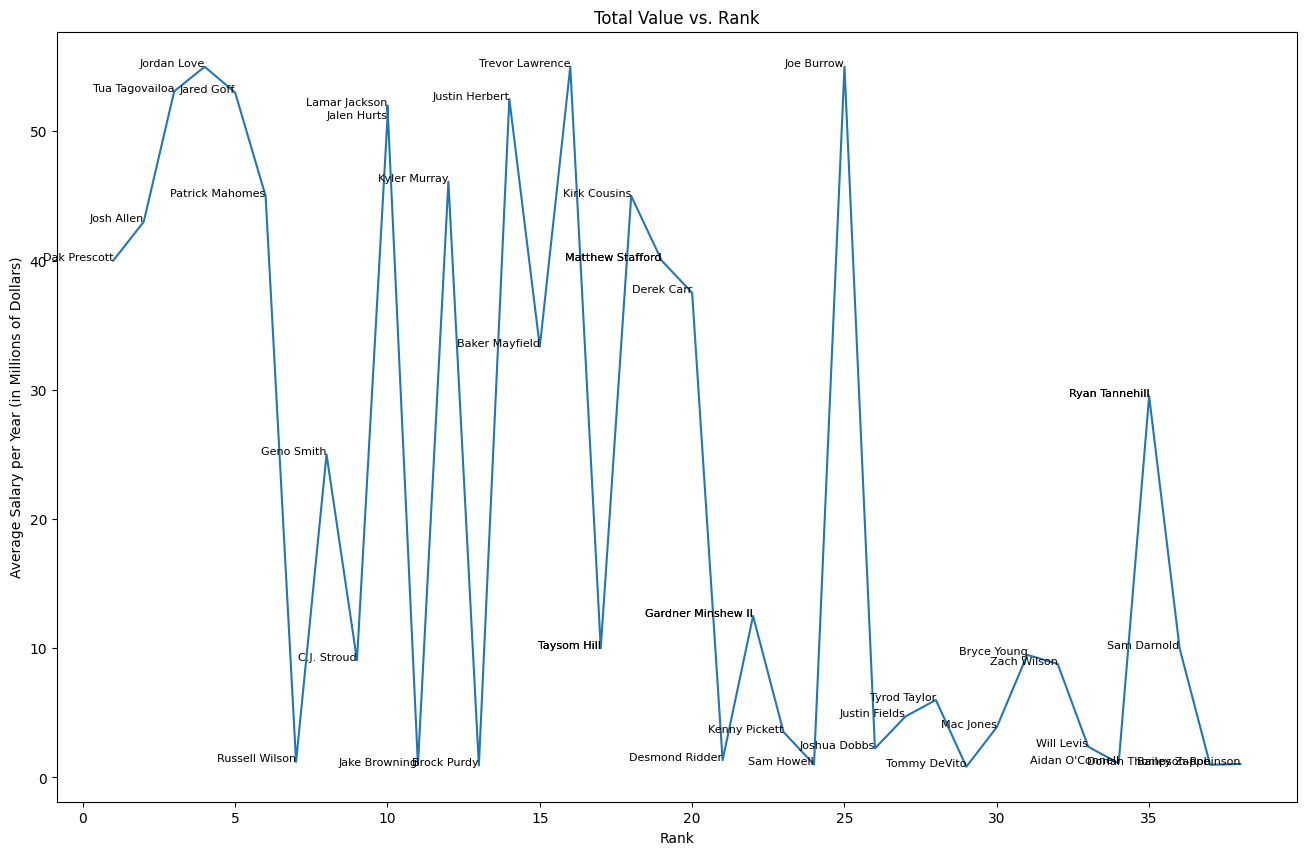

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 10))
plt.plot(combined['final_Rank'], combined['Avg./Year']/1000000)
plt.title('Total Value vs. Rank')
plt.xlabel('Rank')
plt.ylabel('Average Salary per Year (in Millions of Dollars)')
for i, row in combined.iterrows():
    plt.text(row['final_Rank'], row['Avg./Year']/1000000, row['Player'], fontsize=8, ha='right')

plt.show()